<a href="https://colab.research.google.com/github/ckLXHL/learnSomeThing/blob/master/%E8%AE%AD%E7%BB%83%E9%A6%96%E4%B8%AA%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E5%9F%BA%E6%9C%AC%E5%88%86%E7%B1%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.VERSION)
print(tf.keras.__version__)

1.12.0
2.1.6-tf


In [8]:
fashion_mnist = keras.datasets.fashion_mnist
#加载数据集
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(train_images.shape, test_images.shape, train_labels.shape)

(60000, 28, 28) (10000, 28, 28) (60000,)


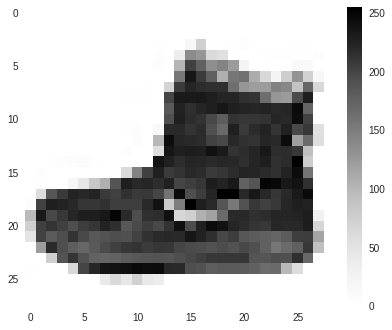

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

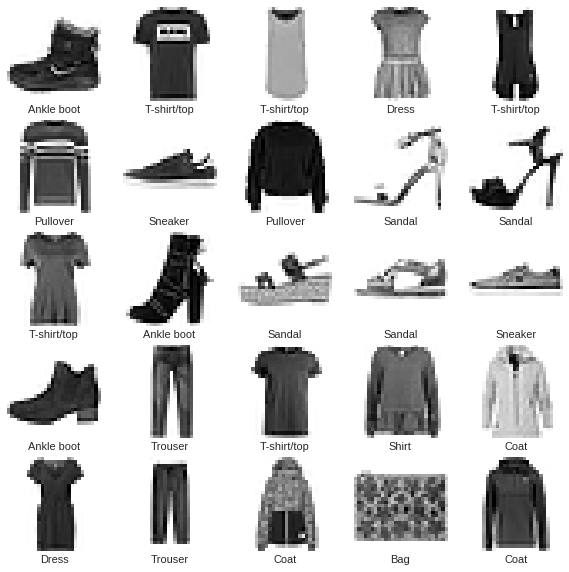

In [17]:
train_images = train_images/255.0
test_images = test_images / 255.0
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 82us/step - loss: 1.0685 - acc: 0.6621
Epoch 2/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.6297 - acc: 0.7727
Epoch 3/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.5564 - acc: 0.8005
Epoch 4/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.5149 - acc: 0.8173
Epoch 5/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.4880 - acc: 0.8271


In [23]:
#测试测试图像
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 40us/step
Test accuracy: 0.8169


In [26]:
predictions = model.predict(test_images)

print(predictions[0])
print(np.argmax(predictions[0]), test_labels[0])


[7.5202672e-07 7.7984033e-08 8.5045831e-06 8.4203930e-06 1.7476286e-05
 9.2605717e-02 1.7951224e-05 3.3346698e-01 6.7452341e-03 5.6712884e-01]
9 9


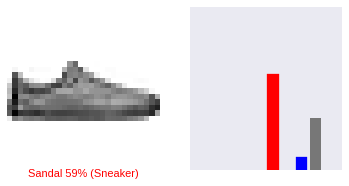

In [28]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

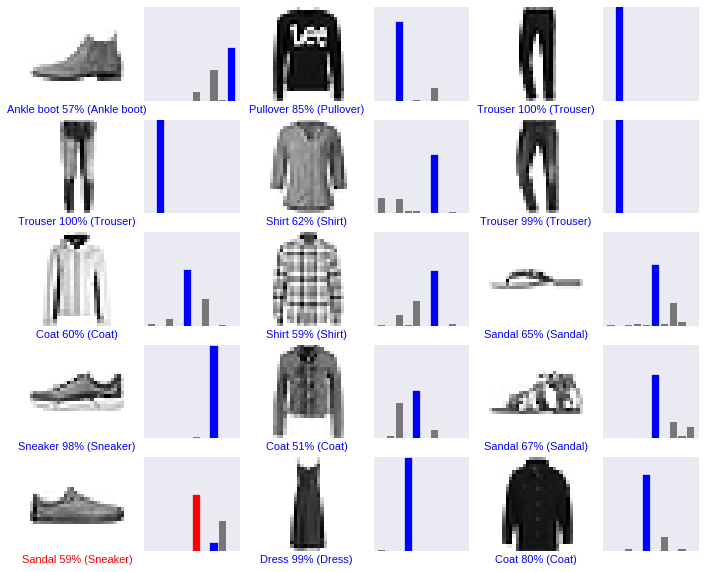

In [29]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)